In [1]:
#importanto as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Warning 
from yellowbrick.regressor import ResidualsPlot 

In [4]:
base = pd.read_csv('cars.csv')
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [5]:
#removendo coluna inutil
base = base.drop(["Unnamed: 0"], axis=1)

In [6]:
base.head(1)

,speed,dist
0,4,2


> Definindo dados: 

- => Distância X é a variável independente
- => Velocidade Y é a variável dependente 

In [24]:
X = base.iloc[:, 1].values
y = base.iloc[:, 0].values

In [25]:
# correlação entre as variáveis:
cor = np.corrcoef(X,y)
cor

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [26]:
# Formato de matriz com uma coluna à mais
X = X.reshape(-1, 1)
# Criação do modelo e treinamento
modelo = LinearRegression()
modelo.fit(X,y)

LinearRegression()

In [27]:
##### Visualização dos coeficientes
print(modelo.intercept_)

##### Inclinação
print(modelo.coef_)

8.283905641787172
[0.16556757]


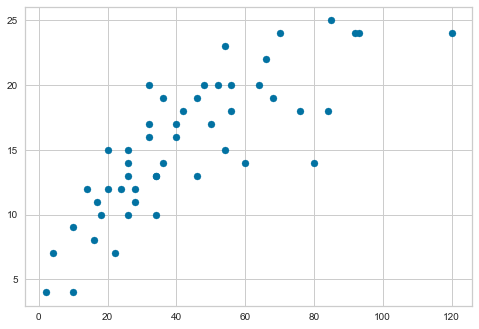

In [32]:
plt.scatter(X,y);

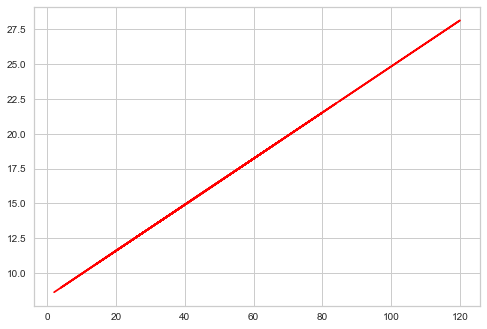

In [33]:
plt.plot(X, modelo.predict(X), color = 'red');

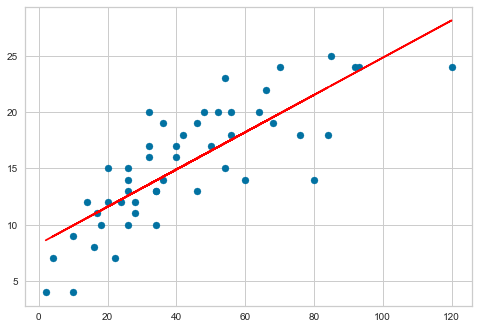

In [34]:
# Gráficos com pontos reais e previsões
plt.scatter(X,y);
plt.plot(X, modelo.predict(X), color = 'red');

In [36]:
# Previsão da Distância de "22 pés" usando a fórmula manural
# interceptação * inclinação * valor da dist
# Qual vel levou 22 pés pra parar?
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

In [37]:
#usando o Sklearn
modelo.predict([[22]])

array([11.92639228])

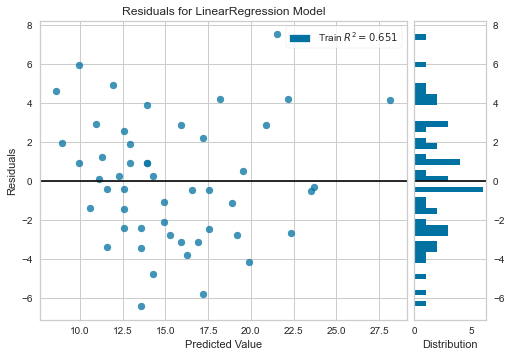

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [40]:
view = ResidualsPlot(modelo)
view.fit(X,y)
view.poof()